<a href="https://colab.research.google.com/github/itssofiarce/regresion-fcdd/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataSet Elegido: Base de datos de graduados universitarios

Fuente: https://www.datos.gob.ar/dataset/produccion-graduados-universitarios-sistema-araucano-2016-2018/archivo/produccion_afbfc04e-6130-448c-953f-ef601f3e8bda

El dataset se encuentra publicado en la página del gobierno nacional, es de libre acceso. Las entidades responsables son Ministerio de Desarrollo Productivo. Unidad Gabinete de Asesores. Dirección Nacional de Estudios para la Producción (CEP XXI).

Los datos contienen información acerca de los graduados universitarios recolectados desde el 2019 al 2021. Todas las variables ya estan codificadas numericamente.






| Título de la columna      | Tipo de dato | Descripción |
| ------------------------- | ------------ | ----------- |
| id                    | Número entero (integer)    | Identificador individual.        |
| rama_id                    | Número entero (integer)    | Identificador de la rama de estudio       |
| disciplina_id                    | Número entero (integer)    | Identificador de disciplina de estudio.       |
| tipo_titulo_id                    | Número entero (integer)    | Identificador de jerarquía de título.       |
| gestion_id                    | Número entero (integer)    | Identificador del tipo de gestión del establecimiento educativo donde se cursaron los estudios.        |
| genero_id                    | Número entero (integer)    | Identificador de género.       |
| region_id                    | Número entero (integer)    | Identificador de la región geográfica donde se cursaron los estudios.       |
| tamaño_id                    | Número entero (integer)    | Identificador del tamaño de la firma donde trabajó el/la gradudado/a, según corresponda.       |
| letra_id                    | Número entero (integer)    | Identificador del sector productivo donde la firma se desempeña.        |
| salario                    | Número decimal (decimal)    | Remuneración total por todo concepto, en pesos corrientes.       |
| anio                    | Número entero (integer)    | Año de observación.       |
| anioegreso                    | Número entero (integer)    | Año de finalización de los estudios.       |
| anioac                    | Número entero (integer)    | Año de nacimiento de la persona graduada.       |

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

In [127]:
df = pd.read_csv('/content/drive/MyDrive/Datos FCDD/base_araucano.csv')
# comparativa completa -> desc general, fal max min, donde cuando, graficos abarcativos
# infor georef
# correlacion

# Analisis Exploratorio

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820335 entries, 0 to 820334
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              820335 non-null  int64  
 1   rama_id         820335 non-null  int64  
 2   disciplina_id   820335 non-null  int64  
 3   tipo_titulo_id  820335 non-null  int64  
 4   gestion_id      820335 non-null  int64  
 5   genero_id       820335 non-null  int64  
 6   region_id       820335 non-null  int64  
 7   tamaño_id       478719 non-null  float64
 8   letra_id        478603 non-null  float64
 9   salario         478719 non-null  float64
 10  anio            820335 non-null  int64  
 11  anioegreso      820335 non-null  int64  
 12  anionac         819147 non-null  float64
dtypes: float64(4), int64(9)
memory usage: 81.4 MB


Las columnas tamaño_id, letra_id, salario y añoac contienen valores nulos.

In [129]:
df.head()

,id,rama_id,disciplina_id,tipo_titulo_id,gestion_id,genero_id,region_id,tamaño_id,letra_id,salario,anio,anioegreso,anionac
0,1,1,1,4,1,1,1,NaN,NaN,NaN,2019,2017,1976.0
1,1,1,1,4,1,1,1,NaN,NaN,NaN,2020,2017,1976.0
2,1,1,1,4,1,1,1,NaN,NaN,NaN,2021,2017,1976.0
3,2,1,1,4,1,1,2,NaN,NaN,NaN,2019,2018,1980.0
4,2,1,1,4,1,1,2,NaN,NaN,NaN,2020,2018,1980.0


In [130]:
df.isnull().sum()

id                     0
rama_id                0
disciplina_id          0
tipo_titulo_id         0
gestion_id             0
genero_id              0
region_id              0
tamaño_id         341616
letra_id          341732
salario           341616
anio                   0
anioegreso             0
anionac             1188
dtype: int64

Como anioac contiene menos del 5% de la totalidad de datos nulos dropeamos los registros con valores nulos para esta columna.

In [131]:
df = df.dropna(subset=['anionac'])

In [132]:
df.isnull().sum()

id                     0
rama_id                0
disciplina_id          0
tipo_titulo_id         0
gestion_id             0
genero_id              0
region_id              0
tamaño_id         340959
letra_id          341075
salario           340959
anio                   0
anioegreso             0
anionac                0
dtype: int64

# Mapeo de valores códigos a valores categoricos

Mas práctico a la hora de plotear nuestras variables

In [133]:
def mapear_codigos_valores(dataset, etiquetas, nombre_hojas):

    df_etiquetado=dataset.copy()
    for hoja in nombre_hojas:
      labels_df = pd.read_excel(etiquetas, sheet_name=f'cod_{hoja}')
      if hoja == 'titulo':
        hoja = 'tipo_titulo'
      genero_id_mapping = {v: k for k, v in labels_df.set_index(f'{hoja}')[f'{hoja}_id'].to_dict().items()}
      df_etiquetado[f'{hoja}_id'] = df_etiquetado[f'{hoja}_id'].map(genero_id_mapping)
    # convertir la columna anio en int
    df_etiquetado['anionac'] = df_etiquetado['anionac'].astype(int)
    return df_etiquetado


In [134]:
df.head()

,id,rama_id,disciplina_id,tipo_titulo_id,gestion_id,genero_id,region_id,tamaño_id,letra_id,salario,anio,anioegreso,anionac
0,1,1,1,4,1,1,1,NaN,NaN,NaN,2019,2017,1976.0
1,1,1,1,4,1,1,1,NaN,NaN,NaN,2020,2017,1976.0
2,1,1,1,4,1,1,1,NaN,NaN,NaN,2021,2017,1976.0
3,2,1,1,4,1,1,2,NaN,NaN,NaN,2019,2018,1980.0
4,2,1,1,4,1,1,2,NaN,NaN,NaN,2020,2018,1980.0


In [135]:
df_etiquetado=mapear_codigos_valores(df, '/content/drive/MyDrive/Datos FCDD/diccionario.xlsx', ['rama', 'disciplina', 'titulo', 'gestion', 'genero', 'region', 'tamaño', 'letra', 'letra'])

In [136]:
df_etiquetado.head()

,id,rama_id,disciplina_id,tipo_titulo_id,gestion_id,genero_id,region_id,tamaño_id,letra_id,salario,anio,anioegreso,anionac
0,1,Ciencias Sociales,Economía y Administración,Posgrado,estatal,mujer,CABA,NaN,NaN,NaN,2019,2017,1976
1,1,Ciencias Sociales,Economía y Administración,Posgrado,estatal,mujer,CABA,NaN,NaN,NaN,2020,2017,1976
2,1,Ciencias Sociales,Economía y Administración,Posgrado,estatal,mujer,CABA,NaN,NaN,NaN,2021,2017,1976
3,2,Ciencias Sociales,Economía y Administración,Posgrado,estatal,mujer,BUENOS AIRES,NaN,NaN,NaN,2019,2018,1980
4,2,Ciencias Sociales,Economía y Administración,Posgrado,estatal,mujer,BUENOS AIRES,NaN,NaN,NaN,2020,2018,1980


# Analisis de las distribuciones de las variables

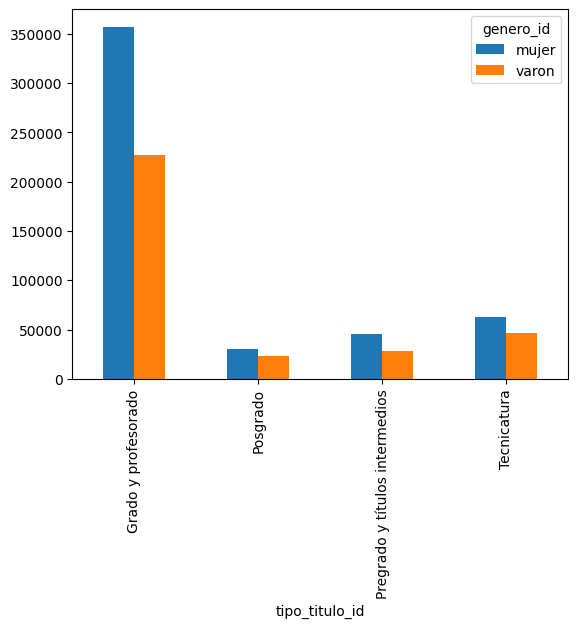

In [137]:
# Gráfico de barras de sexo segun tipo del título
plot = pd.crosstab(index=df_etiquetado['tipo_titulo_id'],
                    columns=df_etiquetado['genero_id']).plot(kind='bar')

Según el gráfico de arriba, predomina el sexo femenino para todos los gradudados universitarios de todos los niveles. Antes de concluir en esto, vamos a comparar si la cantidad de registros de sexo femenino y masculino son los mismos.

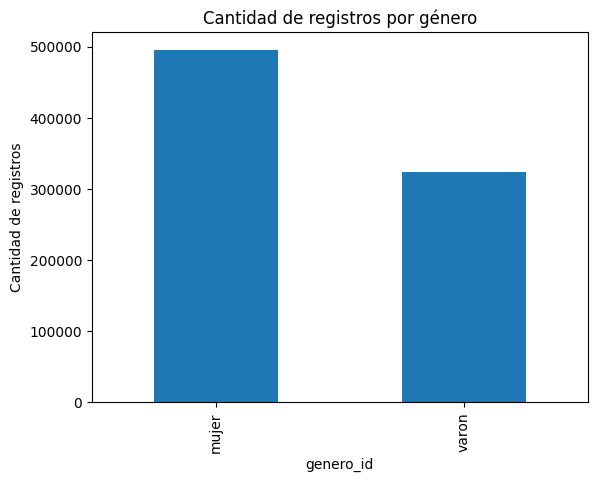

In [138]:
df_etiquetado['genero_id'].value_counts().plot(kind='bar')
plt.ylabel('Cantidad de registros')
plt.title('Cantidad de registros por género')
plt.show()


Efectivamente hay mas registros para el sexo femenino que para el masculino. Esto puede ser un indicador de que en la realidad hay mas mujeres graduadas universitarias que hombres.????

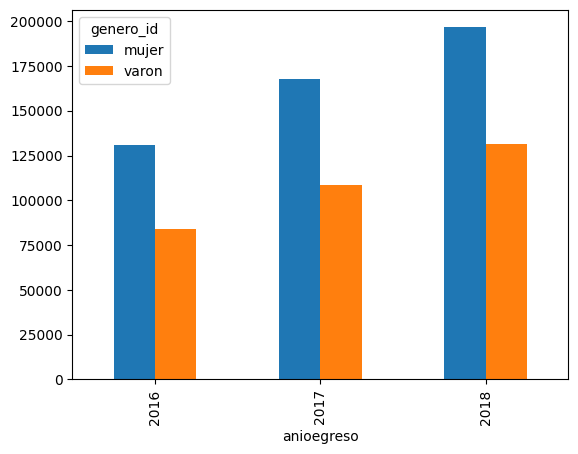

In [139]:
# Gráfico de barras de sexo segun tipo del título
plot = pd.crosstab(index=df_etiquetado['anioegreso'],
                    columns=df_etiquetado['genero_id']).plot(kind='bar')

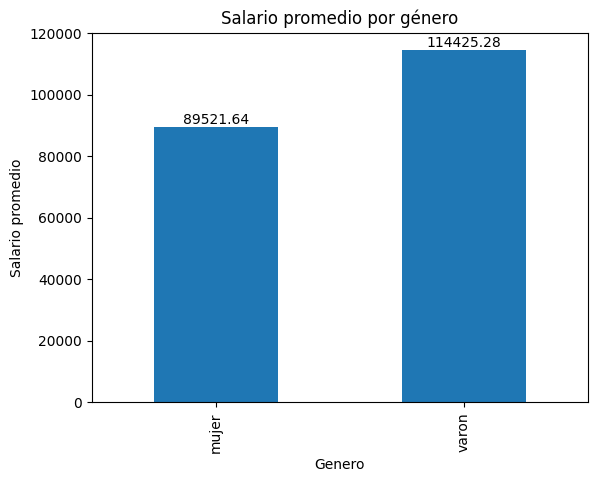

In [140]:
df_etiquetado.groupby('genero_id')['salario'].mean().plot(kind='bar')

# Add labels to the bars with exact numbers
for i, bar in enumerate(plt.gca().patches):
  plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 str(round(bar.get_height(), 2)), ha='center', va='bottom')

plt.xlabel('Genero')
plt.ylabel('Salario promedio')
plt.title('Salario promedio por género')
plt.show()


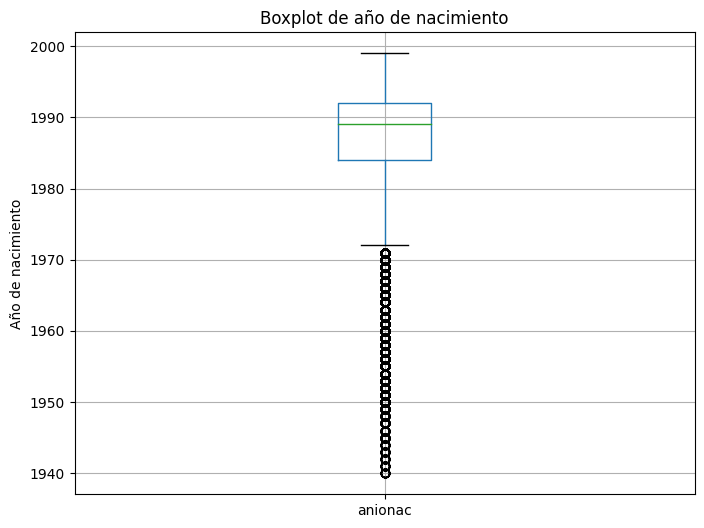

In [141]:
df_etiquetado.boxplot(column='anionac', grid=True, figsize=(8, 6))
plt.ylabel('Año de nacimiento')
plt.title('Boxplot de año de nacimiento')
plt.show()


Alrededor del 50% de los censados nacieron entre el 1940 y el 1989. La longitud de la caja nos indica que no estan muy dispersos los datos entre si, en el histograma siguiente vamos a ver cuántos registros tenemos segun el año de nacimiento.

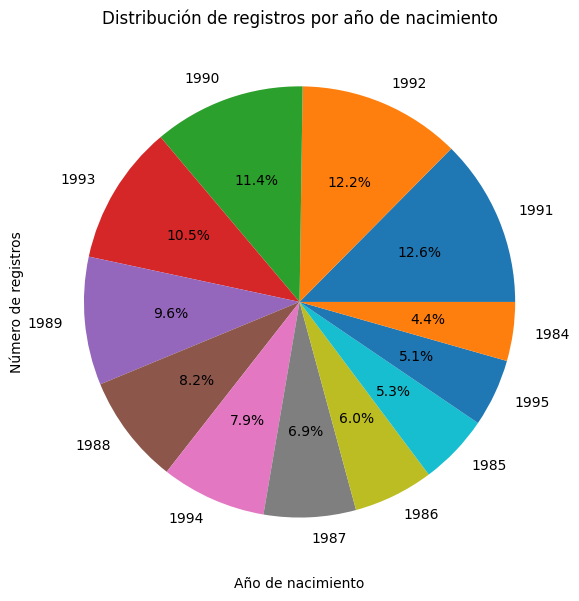

In [153]:
# Count the number of records per anionac
anio_counts = df_etiquetado['anionac'].value_counts()

# Filter out values with less than 3% contribution
filtered_anio_counts = anio_counts[anio_counts > (df_etiquetado.shape[0] * 0.03)]

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(filtered_anio_counts, labels=filtered_anio_counts.index, autopct="%1.1f%%")
plt.title("Distribución de registros por año de nacimiento")
plt.xlabel("Año de nacimiento")
plt.ylabel("Número de registros")
plt.xticks(rotation=90)
plt.show()


El mayor porcentaje de graduados entre el 2016 y 1018 nacieron entre 1989 y 1991.

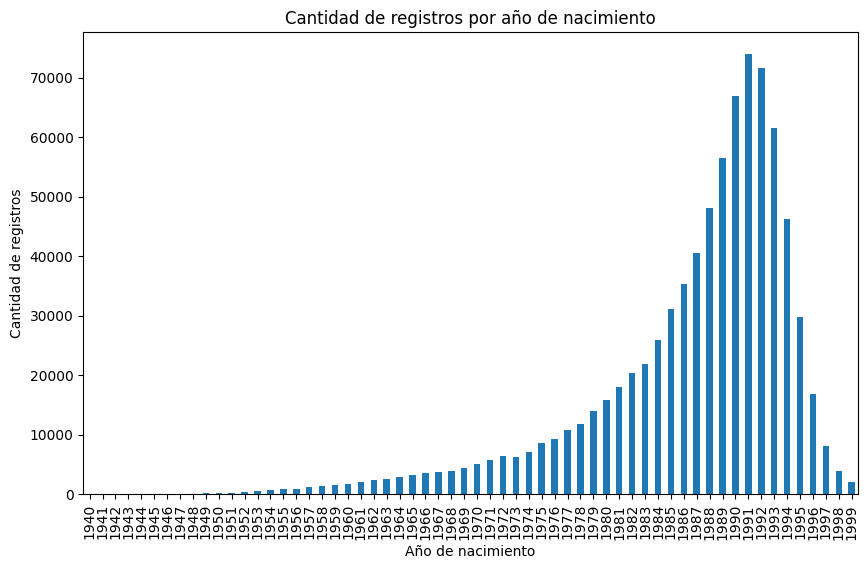

In [159]:
df_etiquetado['anionac'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Año de nacimiento')
plt.ylabel('Cantidad de registros')
plt.title('Cantidad de registros por año de nacimiento')
plt.show()


La cantidad de graduados nacidos despues del 1991 comienza a disminuir.